# **Import Libraries**

In [1]:
# Checking data
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

# Visualization
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from statsmodels.graphics.gofplots import qqplot

# Ignore Warning
import warnings

### **Set Up Libraries**

In [2]:
warnings.simplefilter('ignore')

%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 25)

# **Data Collection**

In [3]:
data = pd.read_csv("data_umkm_kategori_usaha.csv") # load data

data_copy = data.copy(deep=True)

# **Data Preprocessing**

In [4]:
data # cek Keseluruhan Data

,id,kode_provinsi,nama_provinsi,kategori_usaha,jumlah_umkm,satuan,tahun
0,1,32,JAWA BARAT,AKSESORIS,10789,UNIT,2016
1,2,32,JAWA BARAT,BATIK,10789,UNIT,2016
2,3,32,JAWA BARAT,BORDIR,1541,UNIT,2016
3,4,32,JAWA BARAT,CRAFT,385335,UNIT,2016
4,5,32,JAWA BARAT,FASHION,376087,UNIT,2016
...,...,...,...,...,...,...,...
55,56,32,JAWA BARAT,KONVEKSI,310060,UNIT,2021
56,57,32,JAWA BARAT,KULINER,2239092,UNIT,2021
57,58,32,JAWA BARAT,MAKANAN,1637701,UNIT,2021
58,59,32,JAWA BARAT,MINUMAN,303817,UNIT,2021


In [5]:
data.isnull().mean().to_frame() # cek missing data

,0
id,0.0
kode_provinsi,0.0
nama_provinsi,0.0
kategori_usaha,0.0
jumlah_umkm,0.0
satuan,0.0
tahun,0.0


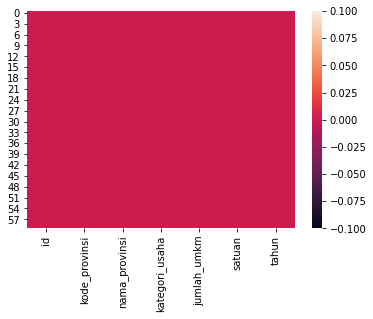

In [6]:
sns.heatmap(data.isnull())
plt.show()

In [7]:
data.dtypes.to_frame() # cek type data

,0
id,int64
kode_provinsi,int64
nama_provinsi,object
kategori_usaha,object
jumlah_umkm,int64
satuan,object
tahun,int64


In [8]:
data.info() # getting information bout the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              60 non-null     int64 
 1   kode_provinsi   60 non-null     int64 
 2   nama_provinsi   60 non-null     object
 3   kategori_usaha  60 non-null     object
 4   jumlah_umkm     60 non-null     int64 
 5   satuan          60 non-null     object
 6   tahun           60 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 3.4+ KB


In [9]:
data.describe() # cek statistical measure

,id,kode_provinsi,jumlah_umkm,tahun
count,60.000000,60.0,6.000000e+01,60.000000
mean,30.500000,32.0,5.413679e+05,2018.500000
std,17.464249,0.0,6.225450e+05,1.722237
min,1.000000,32.0,1.541000e+03,2016.000000
25%,15.750000,32.0,1.371800e+04,2017.000000
50%,30.500000,32.0,3.430735e+05,2018.500000
75%,45.250000,32.0,6.000512e+05,2020.000000
max,60.000000,32.0,2.239092e+06,2021.000000


In [10]:
data.describe(include='all') # cek statistical measure

,id,kode_provinsi,nama_provinsi,kategori_usaha,jumlah_umkm,satuan,tahun
count,60.000000,60.0,60,60,6.000000e+01,60,60.000000
unique,NaN,NaN,1,10,NaN,1,NaN
top,NaN,NaN,JAWA BARAT,MINUMAN,NaN,UNIT,NaN
freq,NaN,NaN,60,6,NaN,60,NaN
mean,30.500000,32.0,NaN,NaN,5.413679e+05,NaN,2018.500000
std,17.464249,0.0,NaN,NaN,6.225450e+05,NaN,1.722237
min,1.000000,32.0,NaN,NaN,1.541000e+03,NaN,2016.000000
25%,15.750000,32.0,NaN,NaN,1.371800e+04,NaN,2017.000000
50%,30.500000,32.0,NaN,NaN,3.430735e+05,NaN,2018.500000
75%,45.250000,32.0,NaN,NaN,6.000512e+05,NaN,2020.000000


# **Data Analysis**

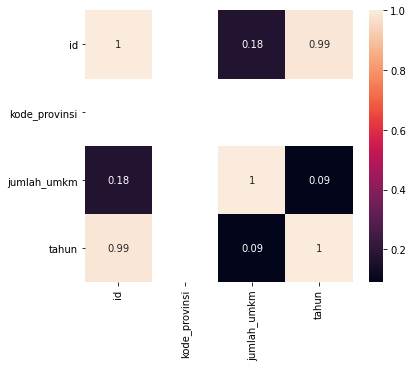

In [11]:
# correlation matrix
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

# **Univariate Analysis**

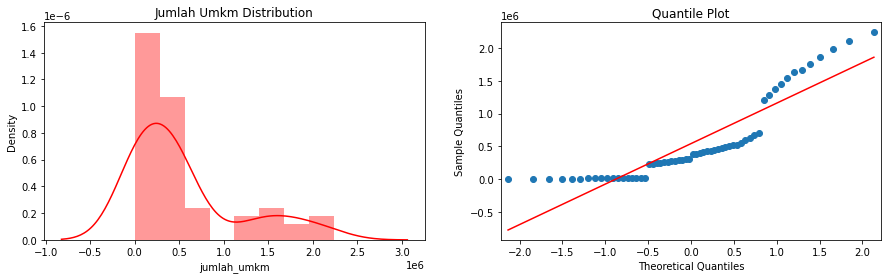

In [12]:
# checking and visualizing the type of distribution of a feature column
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    figsize=(15,4)
)

sns.distplot(
    data['jumlah_umkm'], 
    ax=ax1 , 
    color ='red'
)

ax1.set(title='Jumlah Umkm Distribution')

qqplot(
    data['jumlah_umkm'], 
    ax=ax2, 
    line='s'
)

ax2.set(title='Quantile Plot')

plt.show()

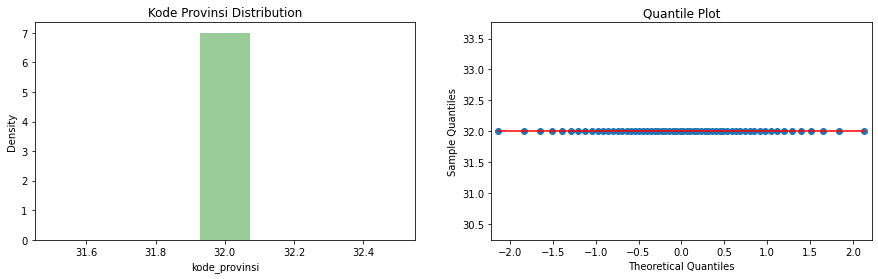

In [14]:
# checking and visualizing the type of distribution of a feature column
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    figsize=(15,4)
)

sns.distplot(
    data['kode_provinsi'], 
    ax=ax1 , 
    color ='green'
)

ax1.set(title='Kode Provinsi Distribution')

qqplot(
    data['kode_provinsi'], 
    ax=ax2, 
    line='s'
)

ax2.set(title='Quantile Plot')

plt.show()

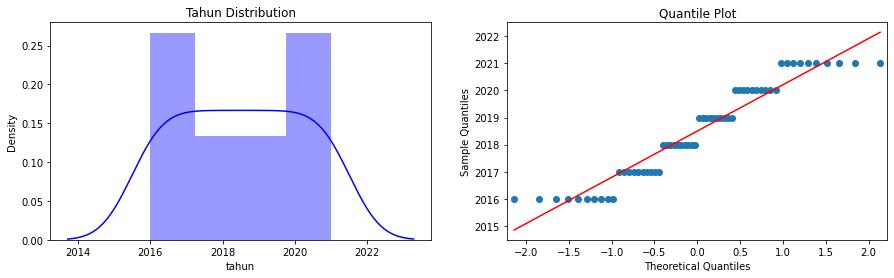

In [16]:
# checking and visualizing the type of distribution of a feature column
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    figsize=(15,4)
)

sns.distplot(
    data['tahun'], 
    ax=ax1 , 
    color ='blue'
)

ax1.set(title='Tahun Distribution')

qqplot(
    data['tahun'], 
    ax=ax2, 
    line='s'
)

ax2.set(title='Quantile Plot')

plt.show()

In [17]:
# checking skewness value 
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed

skew_value = data.skew().sort_values(ascending=False)
skew_value

jumlah_umkm      1.357827
id               0.000000
kode_provinsi    0.000000
tahun            0.000000
dtype: float64

# **Bivariate Analysis**

### **Function**

In [18]:
def bivariate_visualization_bar(data, x, y, color):
    
    """
    Returning Bar Plot Visualization
    for bivariate analysis
    
    data = data
    x = x axis
    y = y axis
    color = color/hue
    title = 'put your title here'
    
    """
    
    fig = px.bar(
        data,
        x=x,
        y=y,
        color=color
    )
    
    return fig.show()

def bivariate_visualization_pie(data, names, title, hole, template='gridon'):
    
    """
    Returning Pie Plot Visualization
    for bivariate analysis
    
    data = data
    names = names
    hole = hole (0.5 / 0,4)
    title = 'put your title here'
    template = template (default 'gridon')
    
    """
    
    fig = px.pie(
        data,
        names=names,
        hole=hole,
        title=title,
        template=template
    )
    
    return fig.show()

def bivariate_visualization_scatter(data, y, x, color, title, template='plotly_dark', trendline='ols'):
    
    """
    Returning Scatter Visualization
    for bivariate analysis
    
    data = data
    y = y axis
    x = x axis
    color = color/hue
    template = template (default 'plotly_dark')
    trendline = trendline (default 'ols')
    
    """
    
    fig = px.scatter(
        data,
        y=y,
        x=x,
        color=color,
        title=title,
        template=template,
        trendline=trendline
    )

    return fig.show()

### **Visualization**

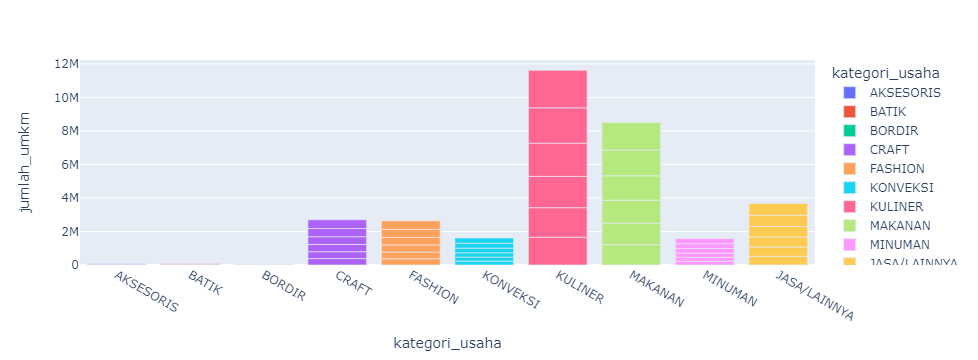

In [19]:
bivariate_visualization_bar(
    data=data,
    x=data['kategori_usaha'],
    y=data['jumlah_umkm'],
    color=data['kategori_usaha']
)

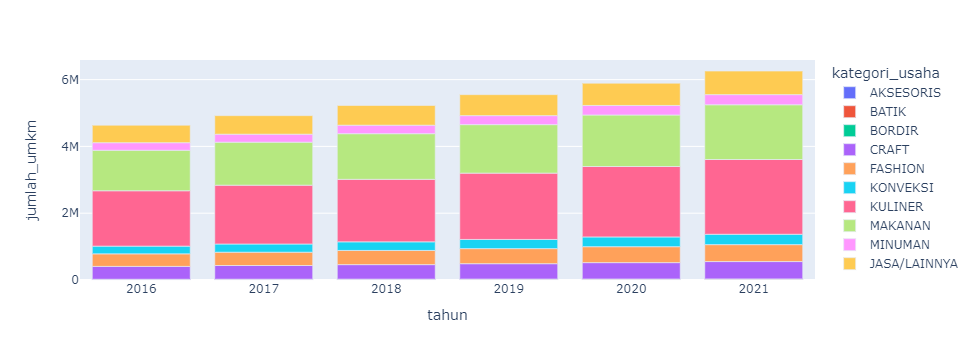

In [21]:
bivariate_visualization_bar(
    data=data,
    x=data['tahun'],
    y=data['jumlah_umkm'],
    color=data['kategori_usaha']
)

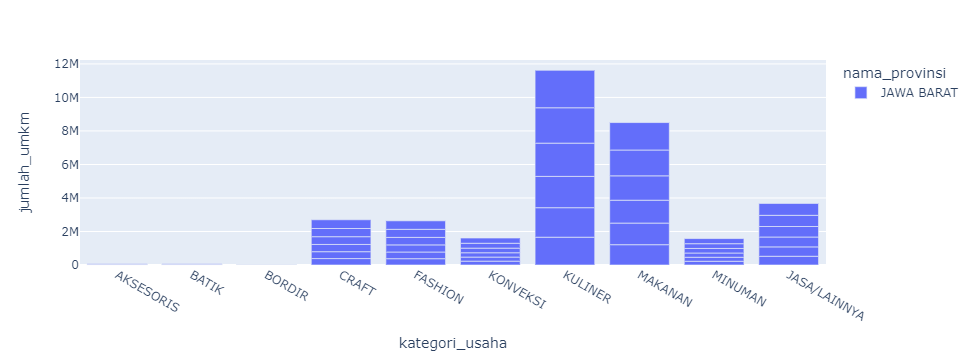

In [22]:
bivariate_visualization_bar(
    data=data,
    x=data['kategori_usaha'],
    y=data['jumlah_umkm'],
    color=data['nama_provinsi']
)

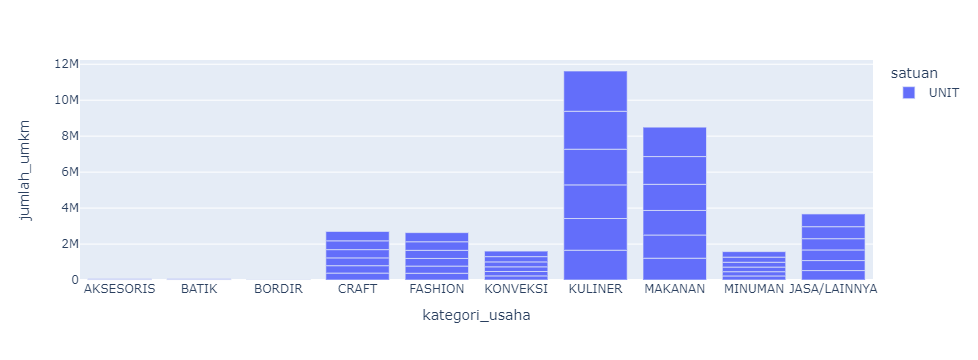

In [23]:
bivariate_visualization_bar(
    data=data,
    x=data['kategori_usaha'],
    y=data['jumlah_umkm'],
    color=data['satuan']
)

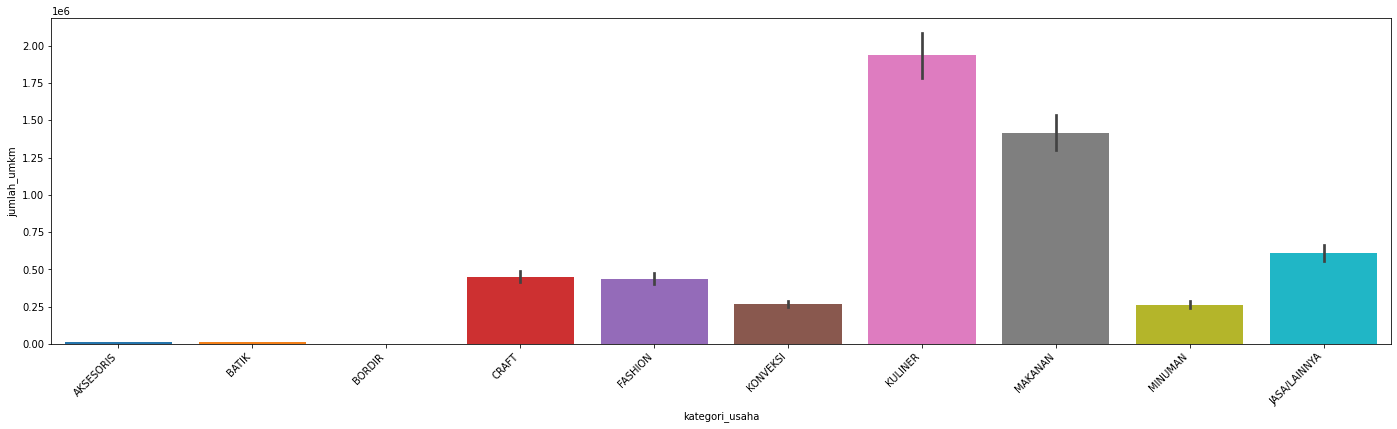

In [24]:
plt.figure(figsize=(24, 6))

viz = sns.barplot(
    x='kategori_usaha', 
    y='jumlah_umkm', 
    data=data,  
    saturation=0.90
)

viz.set_xticklabels(
    viz.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

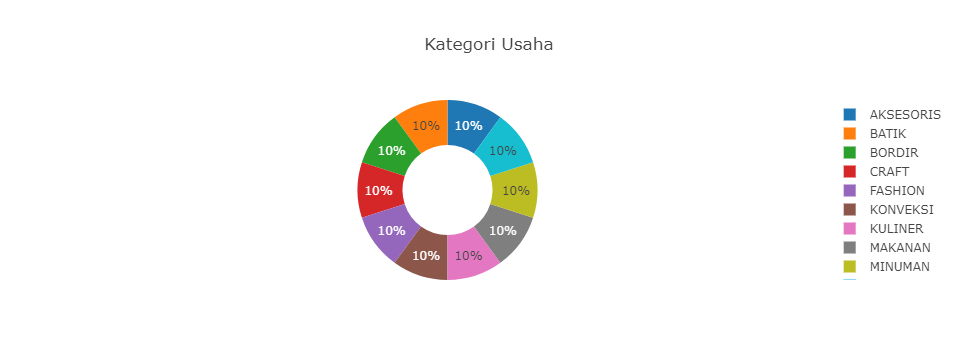

In [25]:
bivariate_visualization_pie(
    data=data,
    names='kategori_usaha',
    title='Kategori Usaha',
    hole=0.5
)

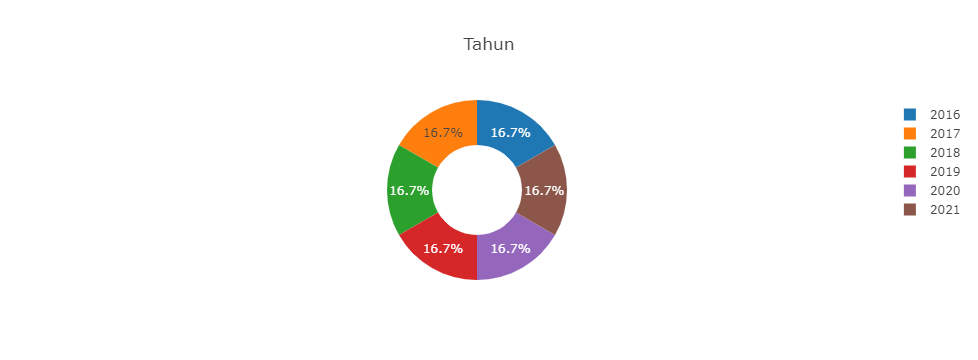

In [27]:
bivariate_visualization_pie(
    data=data,
    names='tahun',
    title='Tahun',
    hole=0.5
)

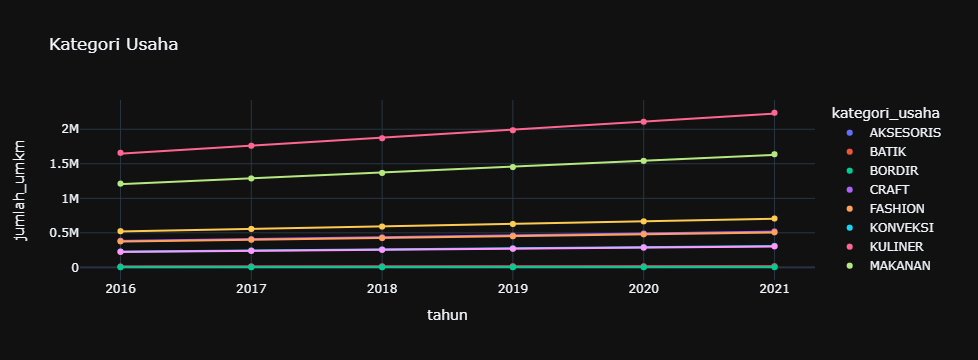

In [30]:
bivariate_visualization_scatter(
    data=data,
    y='jumlah_umkm',
    x='tahun',
    color='kategori_usaha',
    title='Kategori Usaha'
)

# **Multivariate Analysis**

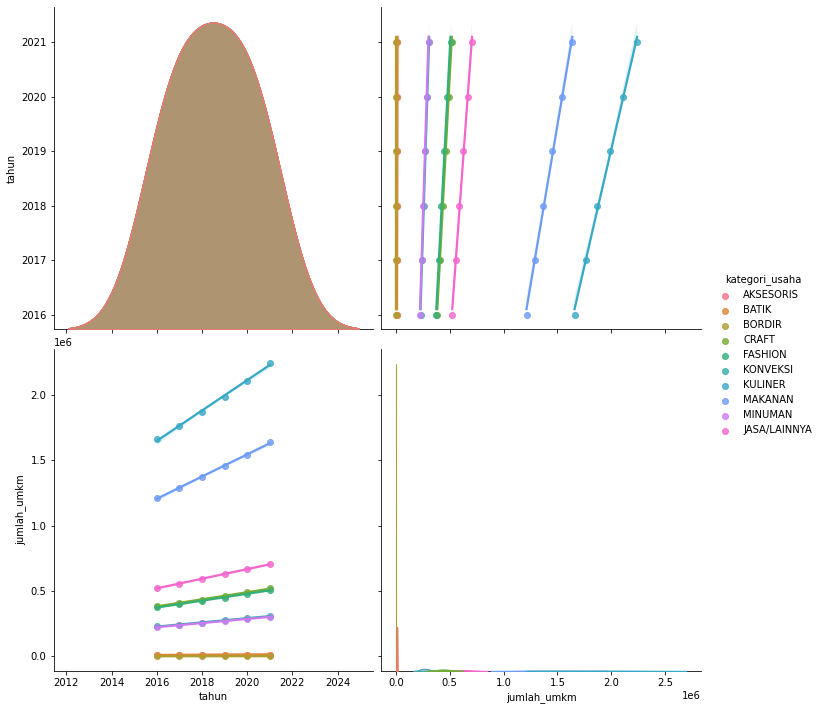

In [34]:
sns.pairplot(
    data=data, 
    vars=['tahun', 'jumlah_umkm'], 
    hue='kategori_usaha', 
    kind='reg', 
    diag_kind='kde', 
    size=5, 
    palette='husl'
)

plt.show()

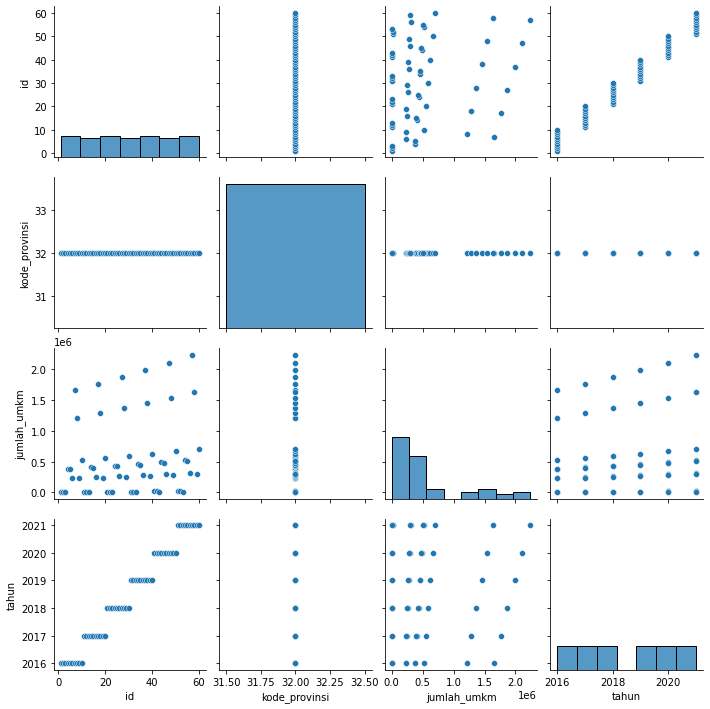

In [36]:
sns.pairplot(data)

# **Kesimpulan:**

* Data memiliki **60 baris** dan **7 kolom**.
* Data tidak memiliki nilai kosong atau **NaN**.
* Data memiliki **3 tipe object data** dan **4 tipe numeric data**.

* Data Numeric diatas memiliki 1 data yang **Skewed/Miring** yaitu **jumlah_umkm** dan 3 data berbentuk **Normal Distribution** yaitu **kode_provinsi, id, dan tahun**.

Dari visualisasi diatas menunjukan bahwa Kategori Usaha Makanan dan Kuliner meningkat dari tahun ketahun, dan di tahun 2021, Kategori Usaha berjumlah 2.2 juta Usaha, sedangkan untuk Kategori Kuliner di tahun 2021 adalah 1.6 juta usaha, ini dikarenakan meningkatnya kebutuhan Makanan maupun Kuliner di masa-masa pandemi seperti ini.